<a href="https://colab.research.google.com/github/ThomasPineda/Movies_Reviews/blob/main/Script%20Python/Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from nltk.metrics import ConfusionMatrix

## Análisis del Corpus

In [ ]:
corpus = movie_reviews.sents()
print(corpus)

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ...]


In [ ]:
movie_reviews.categories()

['neg', 'pos']

In [ ]:
print(movie_reviews.words('neg/cv001_19502.txt'))
movie_reviews.categories('neg/cv001_19502.txt')

['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', ...]


['neg']

In [ ]:
print("Este corpus de texto tiene una cantiad de ",len(corpus)," reseñas sobre películas")

Este corpus de texto tiene una cantiad de  71532  reseñas sobre películas


In [ ]:
Lista = [w for i in corpus for w in i]
print("Además de un total de ",len(Lista)," palabras")

Además de un total de  1583820  palabras


Se sacan las palabras más frecuenes en las reseñas de las películas, pero se observa que estás palabras pueden no ser tan importantes para el analisis ya que la mayoría son conectores.

In [ ]:
frecuencia = nltk.FreqDist(Lista)
frecuencia.most_common(20)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595),
 (')', 11781),
 ('(', 11664),
 ('as', 11378),
 ('with', 10792),
 ('for', 9961)]

Ahora se discriminan las palabras en las reseñas con más de 5 carácteres para poder eliminar todas estás palabras que no tienen
mucho significado dentro del corpus

In [ ]:
long_words = [palabra for palabra in Lista if len(palabra) > 5]
long_words[:20]

['couples',
 'church',
 'accident',
 'girlfriend',
 'continues',
 'nightmares',
 'critique',
 'generation',
 'touches',
 'presents',
 'package',
 'review',
 'harder',
 'generally',
 'applaud',
 'attempt',
 'highway',
 'memento',
 'making',
 'correctly']

Y con esto se sacan las 20 palabras que más aparecen en el corpus de reseñas de películas

In [ ]:
frecuencia = nltk.FreqDist(long_words)
frecuencia.most_common(20)

[('character', 2020),
 ('characters', 1859),
 ('because', 1684),
 ('really', 1558),
 ('little', 1501),
 ('people', 1455),
 ('scenes', 1274),
 ('director', 1237),
 ('movies', 1206),
 ('through', 1190),
 ('action', 1172),
 ('another', 1121),
 ('something', 1061),
 ('before', 992),
 ('however', 989),
 ('between', 965),
 ('though', 940),
 ('better', 922),
 ('audience', 914),
 ('enough', 910)]

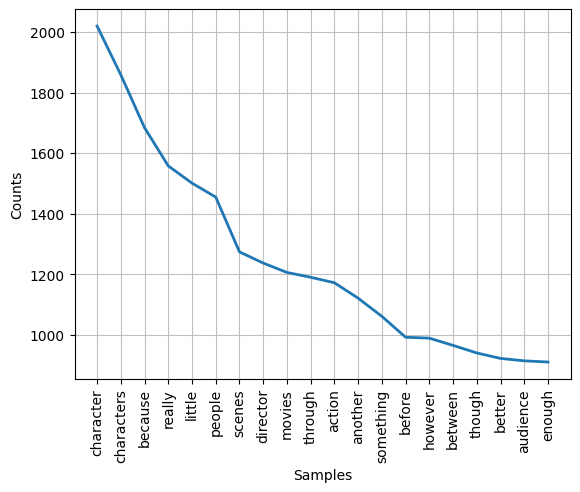

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
frecuencia.plot(20)

In [ ]:
palabras_interesantes = [(palabra,frecuencia[palabra]) for palabra in set(Lista) if len(palabra) > 5 and frecuencia[palabra] > 10]

In [ ]:
palabras_interesantes = [(palabra,frecuencia[palabra]) for palabra in set(Lista) if len(palabra) > 5 and frecuencia[palabra] > 10]
dtypes = [('words','S10'), ('frequency',int)]
palabras_interesantes = np.array(palabras_interesantes,dtype = dtypes)
palabras_interesantes = np.sort(palabras_interesantes, order = 'frequency')[::-1][:20]
palabras_interesantes = list(palabras_interesantes)
palabras_interesantes

[(b'character', 2020),
 (b'characters', 1859),
 (b'because', 1684),
 (b'really', 1558),
 (b'little', 1501),
 (b'people', 1455),
 (b'scenes', 1274),
 (b'director', 1237),
 (b'movies', 1206),
 (b'through', 1190),
 (b'action', 1172),
 (b'another', 1121),
 (b'something', 1061),
 (b'before', 992),
 (b'however', 989),
 (b'between', 965),
 (b'though', 940),
 (b'better', 922),
 (b'audience', 914),
 (b'enough', 910)]

## **Clasificación de reseñas**

###Preparación de los datos

Ya pasaremos a la clasificación de las reseñas según sus dos categorias (Positivas o Negativas), para esto se va utilizar la lista de long_words las cuales contienen las palabras con más de 5 letras que tienen mayor relevancia en el texto. Con esta lista de palabras relevantes en las reseñas se procederá a cosntruir las caracteristicas que evaluara el clasificador para encontrar patrones de clasificación en las reseñas

In [ ]:
len(set(long_words))
long_words = set(long_words)

In [ ]:
feature_vector = list(long_words)[:1000]

Luego de tener las mil palabras más significativas del texto según su frecuencia las compararemos con las reseñas para saber en cada reseña cuales palabras están aapreciendo de nuestras palabras más importantes y con esto tener una idea de como sería una reseña Positiva y una Negativa

In [ ]:
feature = {}

review = movie_reviews.words('neg/cv954_19932.txt')

for x in range(len(feature_vector)):
 feature[feature_vector[x]] = feature_vector[x] in review

[x for x in feature_vector if feature[x] == True]


['uncover', 'smarter', 'abilities']

En este caso la reseña es 'neg' osea Negativa y eso lo podemos ver con palabras que aparecen en la reseñena como lo son: 'unfortunately', 'unlike',

In [ ]:
movie_reviews.categories('neg/cv954_19932.txt')

['neg']

In [ ]:
data = [(movie_reviews.words(file_id),category) for
            file_id in movie_reviews.fileids() for
            category in movie_reviews.categories(file_id)]
data

[(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...], 'neg'),
 (['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', ...], 'neg'),
 (['it', 'is', 'movies', 'like', 'these', 'that', 'make', ...], 'neg'),
 (['"', 'quest', 'for', 'camelot', '"', 'is', 'warner', ...], 'neg'),
 (['synopsis', ':', 'a', 'mentally', 'unstable', 'man', ...], 'neg'),
 (['capsule', ':', 'in', '2176', 'on', 'the', 'planet', ...], 'neg'),
 (['so', 'ask', 'yourself', 'what', '"', '8mm', '"', '(', ...], 'neg'),
 (['that', "'", 's', 'exactly', 'how', 'long', 'the', ...], 'neg'),
 (['call', 'it', 'a', 'road', 'trip', 'for', 'the', ...], 'neg'),
 (['plot', ':', 'a', 'young', 'french', 'boy', 'sees', ...], 'neg'),
 (['best', 'remembered', 'for', 'his', 'understated', ...], 'neg'),
 (['janeane', 'garofalo', 'in', 'a', 'romantic', ...], 'neg'),
 (['and', 'now', 'the', 'high', '-', 'flying', 'hong', ...], 'neg'),
 (['a', 'movie', 'like', 'mortal', 'kombat', ':', ...], 'neg'),
 (['she', 'was', 'the', 'femme', 'in', 

In [ ]:
def caracteristicas(lista,feature_list):
    features = {}

    for i in feature_list:
        features[i] = i in lista

    return feature

In [ ]:
r = caracteristicas(data, feature_vector)
r

{'restoration': False,
 'schulz': False,
 'cosmopolitan': False,
 'magenta': False,
 'wednesdays': False,
 'flirtatiously': False,
 'amplified': False,
 'sensuality': False,
 'powering': False,
 'abandon': False,
 'outpost': False,
 'ideologically': False,
 'popping': False,
 'drawls': False,
 'filthy': False,
 'companion': False,
 'errand': False,
 'impressionable': False,
 'appropriately': False,
 'horrocks': False,
 'soundstage': False,
 'informs': False,
 'predicament': False,
 'jumped': False,
 'somebody': False,
 'faggot': False,
 'adventures': False,
 'tasteful': False,
 'misused': False,
 'construction': False,
 'cousine': False,
 'security': False,
 'stepfather': False,
 'isaacman': False,
 'bisset': False,
 'belfast': False,
 'tripping': False,
 'trumpeter': False,
 'thwart': False,
 'proves': False,
 'fiddling': False,
 'picaresque': False,
 'schlumpy': False,
 'bitterly': False,
 'exclamation': False,
 'socialist': False,
 'packaged': False,
 'reprimand': False,
 'torpedoes

In [ ]:
features = [(caracteristicas(long_words, feature_vector),category) for (long_words,category) in data]

In [ ]:
features[1]

({'restoration': False,
  'schulz': False,
  'cosmopolitan': False,
  'magenta': False,
  'wednesdays': False,
  'flirtatiously': False,
  'amplified': False,
  'sensuality': False,
  'powering': False,
  'abandon': False,
  'outpost': False,
  'ideologically': False,
  'popping': False,
  'drawls': False,
  'filthy': False,
  'companion': False,
  'errand': False,
  'impressionable': False,
  'appropriately': False,
  'horrocks': False,
  'soundstage': False,
  'informs': False,
  'predicament': False,
  'jumped': False,
  'somebody': False,
  'faggot': False,
  'adventures': False,
  'tasteful': False,
  'misused': False,
  'construction': False,
  'cousine': False,
  'security': False,
  'stepfather': False,
  'isaacman': False,
  'bisset': False,
  'belfast': False,
  'tripping': False,
  'trumpeter': False,
  'thwart': False,
  'proves': False,
  'fiddling': False,
  'picaresque': False,
  'schlumpy': False,
  'bitterly': False,
  'exclamation': False,
  'socialist': False,
  'pac

In [ ]:
train,test = model_selection.train_test_split(features,test_size = 0.25)

### Modelo de clasificación

In [ ]:
modelo = SklearnClassifier(SVC(kernel = 'linear'))
modelo.train(train)

<SklearnClassifier(SVC(kernel='linear'))>

In [ ]:
accuracy = nltk.classify.accuracy(modelo, test)
print('Modelo Accuracy : {}'.format(accuracy))

Modelo Accuracy : 0.498


### Conclusión

El modelo tiene una precisión del 50%, lo que quiere decir que no alcanza a decribir bien los patrones de clasificación de las reseñas, una manera de mejorar el desempeño del modelo es añadiendo más palabras a la lista de Lon_Words con el fin de que tenga más palabras para clasificar las reseñas, otra manera de que se pueda mejorar es añadiendo más atributos, como la frecuencia de cada palabra en el corpus y hacer ingenieria de atributos para rescatas más caracteristicas importantes.